The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.
You need to build a classification model. 

Use machine learning to determine which physiochemical properties make a wine 'good'!


Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [3]:
cutoff_value=7
df['good_wine'] = df['quality'].apply(lambda x: 1 if x >= cutoff_value else 0)

In [4]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  good_wine  
0         9.4        5          0  
1         9.8        5          0  
2         9.8        5          0  
3         9.8        6          0  
4         9.4        5          0  
...       ...      ...        ...  
1594     10.5        5          0  
1595     11.2        6          0  
1596     11.0        6          0  
1597     10.2        5          0  
1598     11.0        6          0  

[1599 rows x 13 columns]

In [5]:
df.good_wine.unique()

array([0, 1], dtype=int64)

In [6]:
df.good_wine.value_counts()

0    1382
1     217
Name: good_wine, dtype: int64

0    1382
1     217
Name: good_wine, dtype: int64


<AxesSubplot:xlabel='good_wine', ylabel='count'>

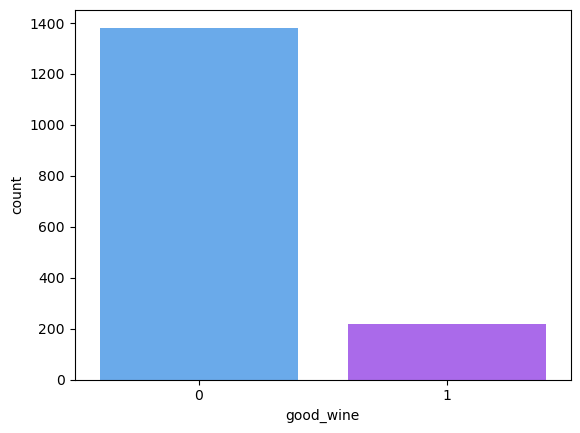

In [7]:
print(df['good_wine'].value_counts())
sns.countplot(df['good_wine'],palette="cool")

In [8]:
df.shape

(1599, 13)

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good_wine'],
      dtype='object')

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good_wine                 int64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  good_wine             1599 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.5 KB


observation :- 
    
1)All the parameter except quality have decimal/float64 vales whereas quality have integer value

2) There is no null value present in the dataset

In [12]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  good_wine  
0      9.4        5          0  
1      9.8        5          0  
2      9.8        5          0  
3      9.8        6          0  
4      9.4        5          0  
5      9.4        5          0  
6      9.4        5          0  
7     10.0        7          1  
8      9.5        7          1  
9     10.5        5          0

In [13]:
df.tail(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1589            6.6             0.725         0.20             7.8      0.073   
1590            6.3             0.550         0.15             1.8      0.077   
1591            5.4             0.740         0.09             1.7      0.089   
1592            6.3             0.510         0.13             2.3      0.076   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1589                 29.0                  79.0  0.99770  3.29       0.54   
1590                 26.0                  35.0  0.99314  3.32       0.82   
1591                 16.0                  26.0  0.99402  3.67       0.56   
1592                 29.0                  40.0  0.99574  3.42       0.75   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  good_wine  
1589      9.2        5          0  
1590     11.6        6          0  
1591     11.6        6          0  
1592     11.0        6          0  
1593      9.5        6          0  
1594     10.5        5          0  
1595     11.2        6          0  
1596     11.0        6          0  
1597     10.2        5          0  
1598     11.0        6          0

In [14]:
df.sample(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1389            6.7              0.48         0.02             2.2      0.080   
828             7.8              0.57         0.09             2.3      0.065   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1389                 36.0                 111.0  0.99524  3.10       0.53   
828                  34.0                  45.0  0.99417  3.46       0.74   

      alcohol  quality  good_wine  
1389      9.7        5          0  
828      12.7        8          1

In [15]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality    good_wine  
count  1599.000000  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023     0.135710  
std       0.154386     0.169507     1.065668     0.807569     0.342587  
min       2.740000     0.330000     8.400000     3.000000     0.000000  
25%       3.210000     0.550000     9.500000     5.000000     0.000000  
50%       3.310000     0.620000    10.200000     6.000000     0.000000  
75%       3.400000     0.730000    11.100000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     8.000000     1.000000

Observation :- 
1)Standard deviation is high in "free sulfur dioxide","total sulfur dioxide". Here the data is spreaded and there is possibility of outliers

2)In "fixed acidity","free sulfur dioxide","total sulfur dioxide" mean>median, hence data have bit of skewness in this columns

3)There is a difference between 75% and mazimum value in "fixed acidity","residual sugar","free sulfur dioxide","total sulfur dioxide" hence there is a possibility of outliers

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good_wine               0
dtype: int64

<AxesSubplot:>

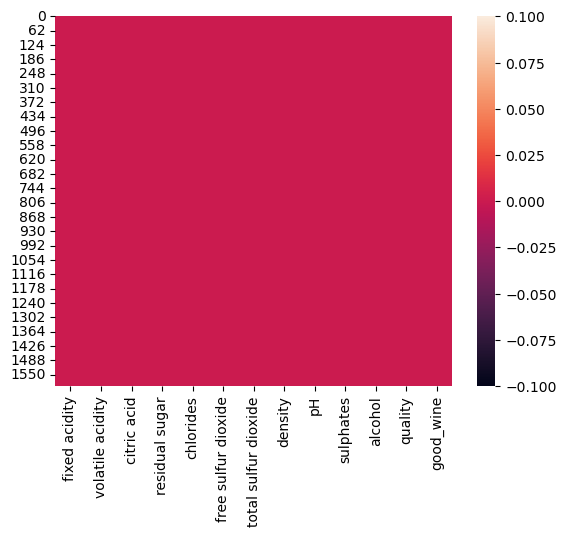

In [17]:
sns.heatmap(df.isnull())

In [18]:
dfcor=df.corr()
dfcor

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   
good_wine                  0.120061         -0.270712     0.214716   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   
quality                     0.013732  -0.128907            -0.050656   
good_wine                   0.047779  -0.097308            -0.071747   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   
quality                          -0.185100 -0.174919 -0.057731   0.251397   
good_wine                        -0.139517 -0.150460 -0.057283   0.199485   

                       alcohol   quality  good_wine  
fixed acidity        -0.061668  0.124052   0.120061  
volatile acidity     -0.202288 -0.390558  -0.270712  
citric acid           0.109903  0.226373   0.214716  
residual sugar        0.042075  0.013732   0.047779  
chlorides            -0.221141 -0.128907  -0.097308  
free sulfur dioxide  -0.069408 -0.050656  -0.071747  
total sulfur dioxide -0.205654 -0.185100  -0.139517  
density              -0.496180 -0.174919  -0.150460  
pH                    0.205633 -0.057731  -0.057283  
sulphates             0.093595  0.251397   0.199485  
alcohol               1.000000  0.476166   0.407315  
quality               0.476166  1.000000   0.710196  
good_wine             0.407315  0.710196   1.000000

<AxesSubplot:>

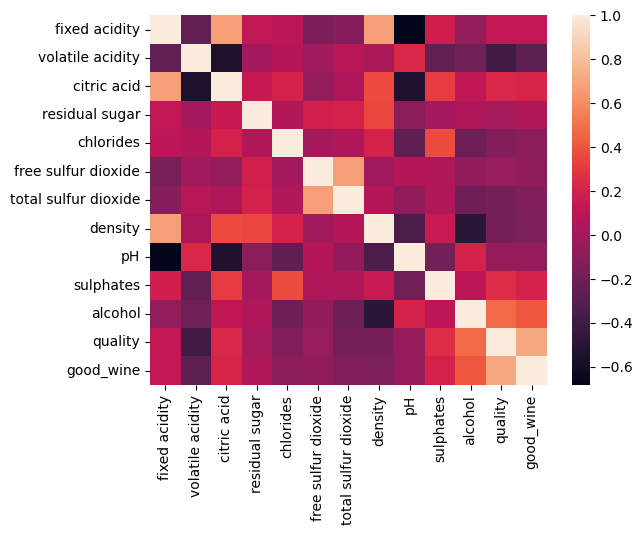

In [19]:
sns.heatmap(dfcor)

observation:- We can drop the negativly correleted values, here in heatmap we can observe that "volatile acidity0" is negatively correleted hence it can be dropped 

In [20]:
df.drop('volatile acidity',axis=1,inplace=True)

In [21]:
df

fixed acidity  citric acid  residual sugar  chlorides  \
0               7.4         0.00             1.9      0.076   
1               7.8         0.00             2.6      0.098   
2               7.8         0.04             2.3      0.092   
3              11.2         0.56             1.9      0.075   
4               7.4         0.00             1.9      0.076   
...             ...          ...             ...        ...   
1594            6.2         0.08             2.0      0.090   
1595            5.9         0.10             2.2      0.062   
1596            6.3         0.13             2.3      0.076   
1597            5.9         0.12             2.0      0.075   
1598            6.0         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  good_wine  
0         9.4        5          0  
1         9.8        5          0  
2         9.8        5          0  
3         9.8        6          0  
4         9.4        5          0  
...       ...      ...        ...  
1594     10.5        5          0  
1595     11.2        6          0  
1596     11.0        6          0  
1597     10.2        5          0  
1598     11.0        6          0  

[1599 rows x 12 columns]

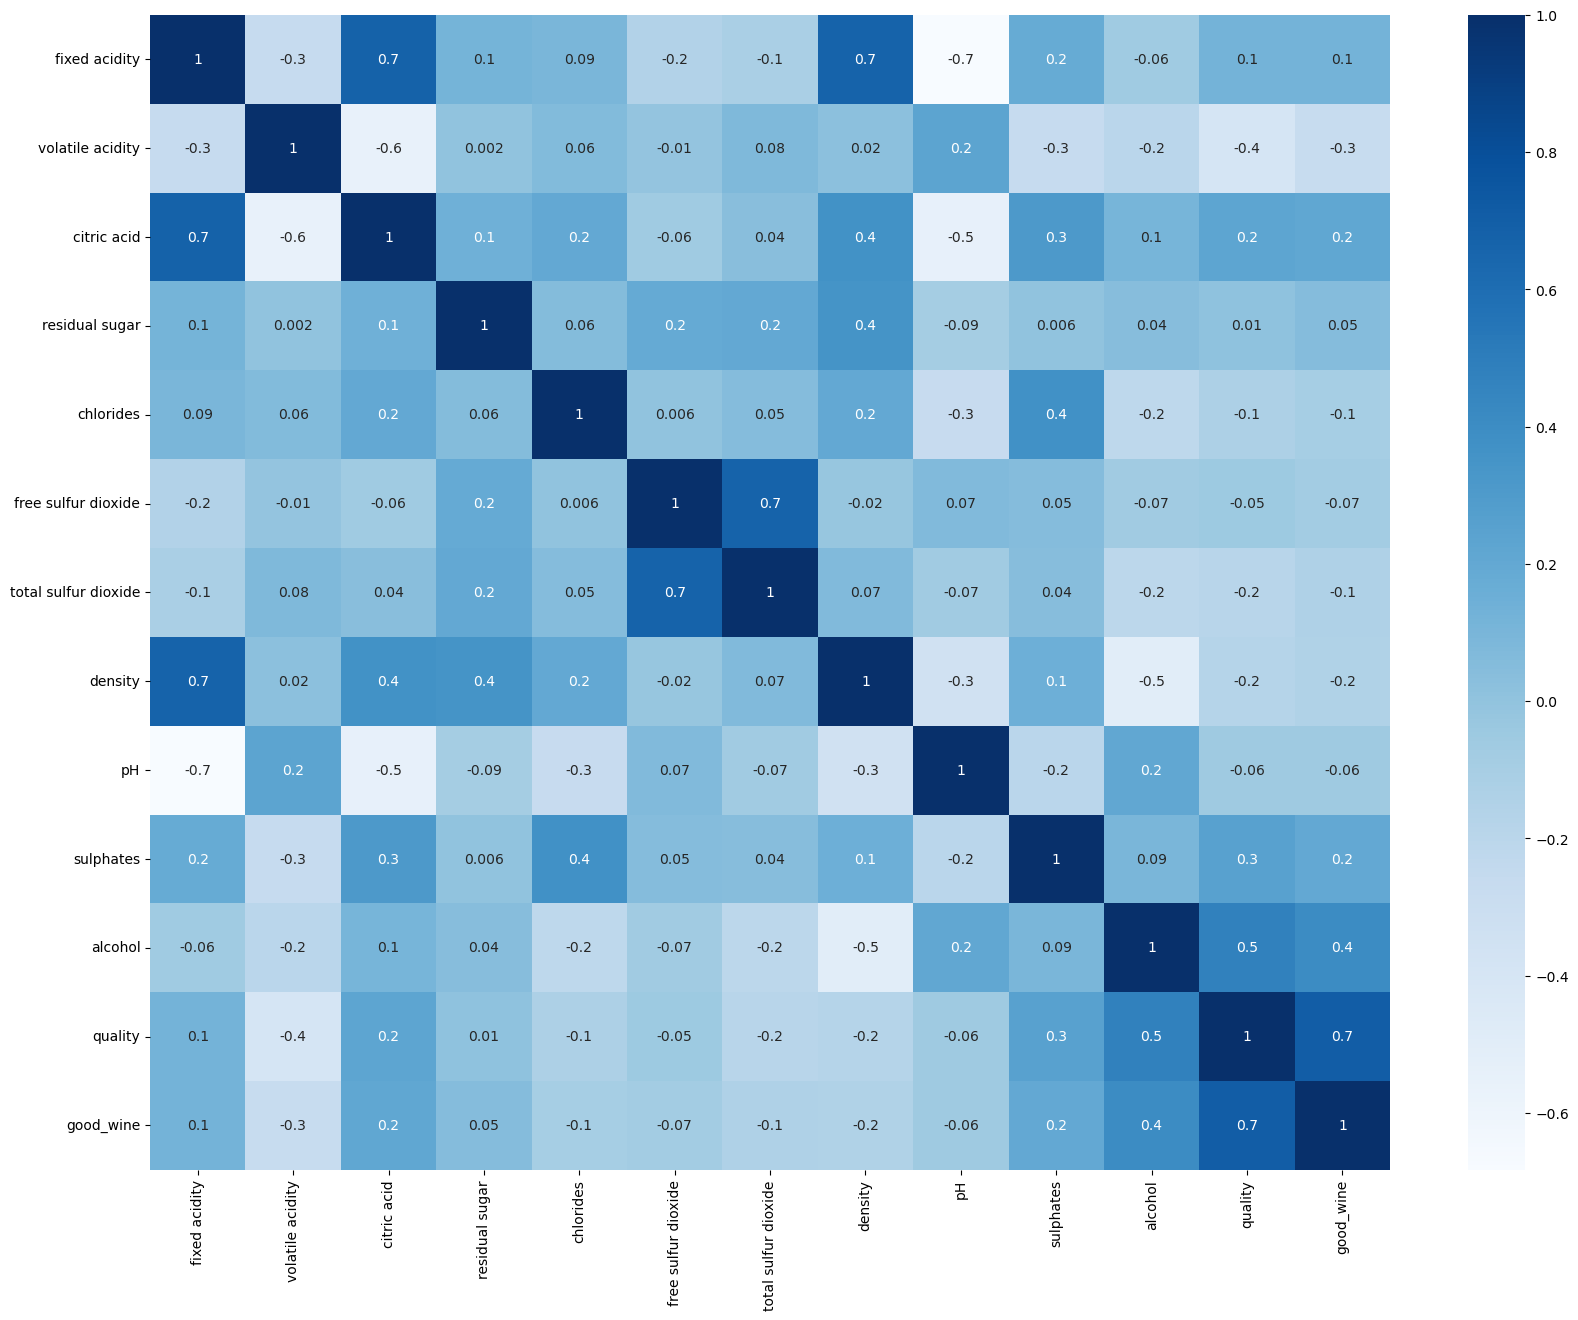

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(dfcor,cmap='Blues',fmt=".1g",annot=True)
plt.yticks(rotation=0);
plt.show()


Observation :- "Free sulfur dioxide","total sulfur dioxide" is correleted 

Observation :- This heatmap shows the correlation matrix by visualizing the data. We can observe the relation feature to feature and feature to label. This heatmap contains both positive and negative correlation

    

In [23]:
df['good_wine'].sort_values(ascending=False)

1030    1
978     1
369     1
538     1
1433    1
       ..
570     0
569     0
568     0
567     0
1598    0
Name: good_wine, Length: 1599, dtype: int64

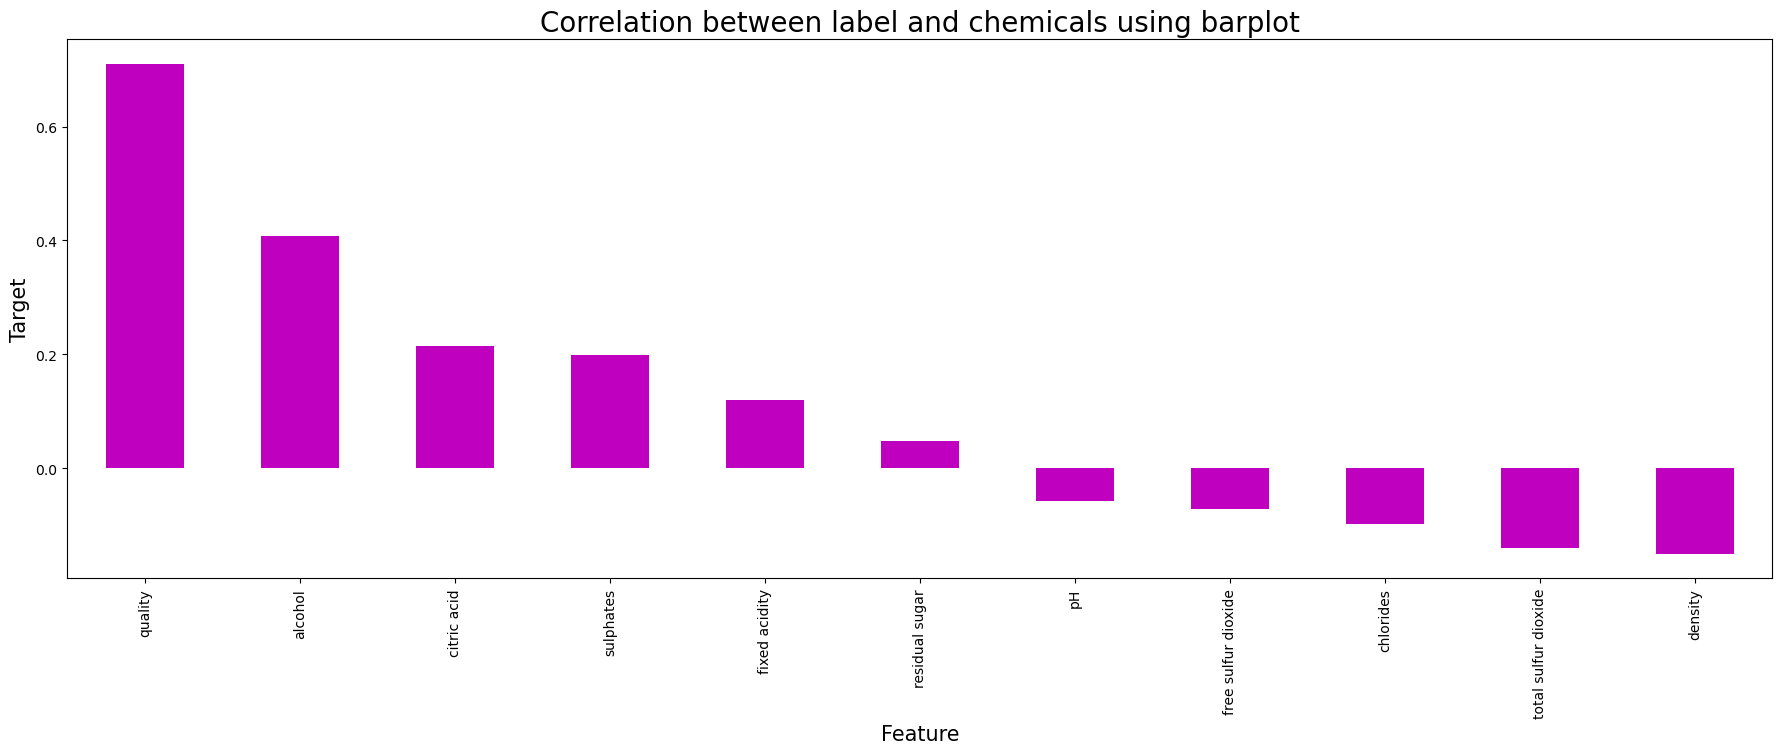

In [24]:
plt.figure(figsize=(22,7))
df.corr()['good_wine'].sort_values(ascending = False).drop(['good_wine']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize =15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between label and chemicals using barplot",fontsize=20)
plt.show()

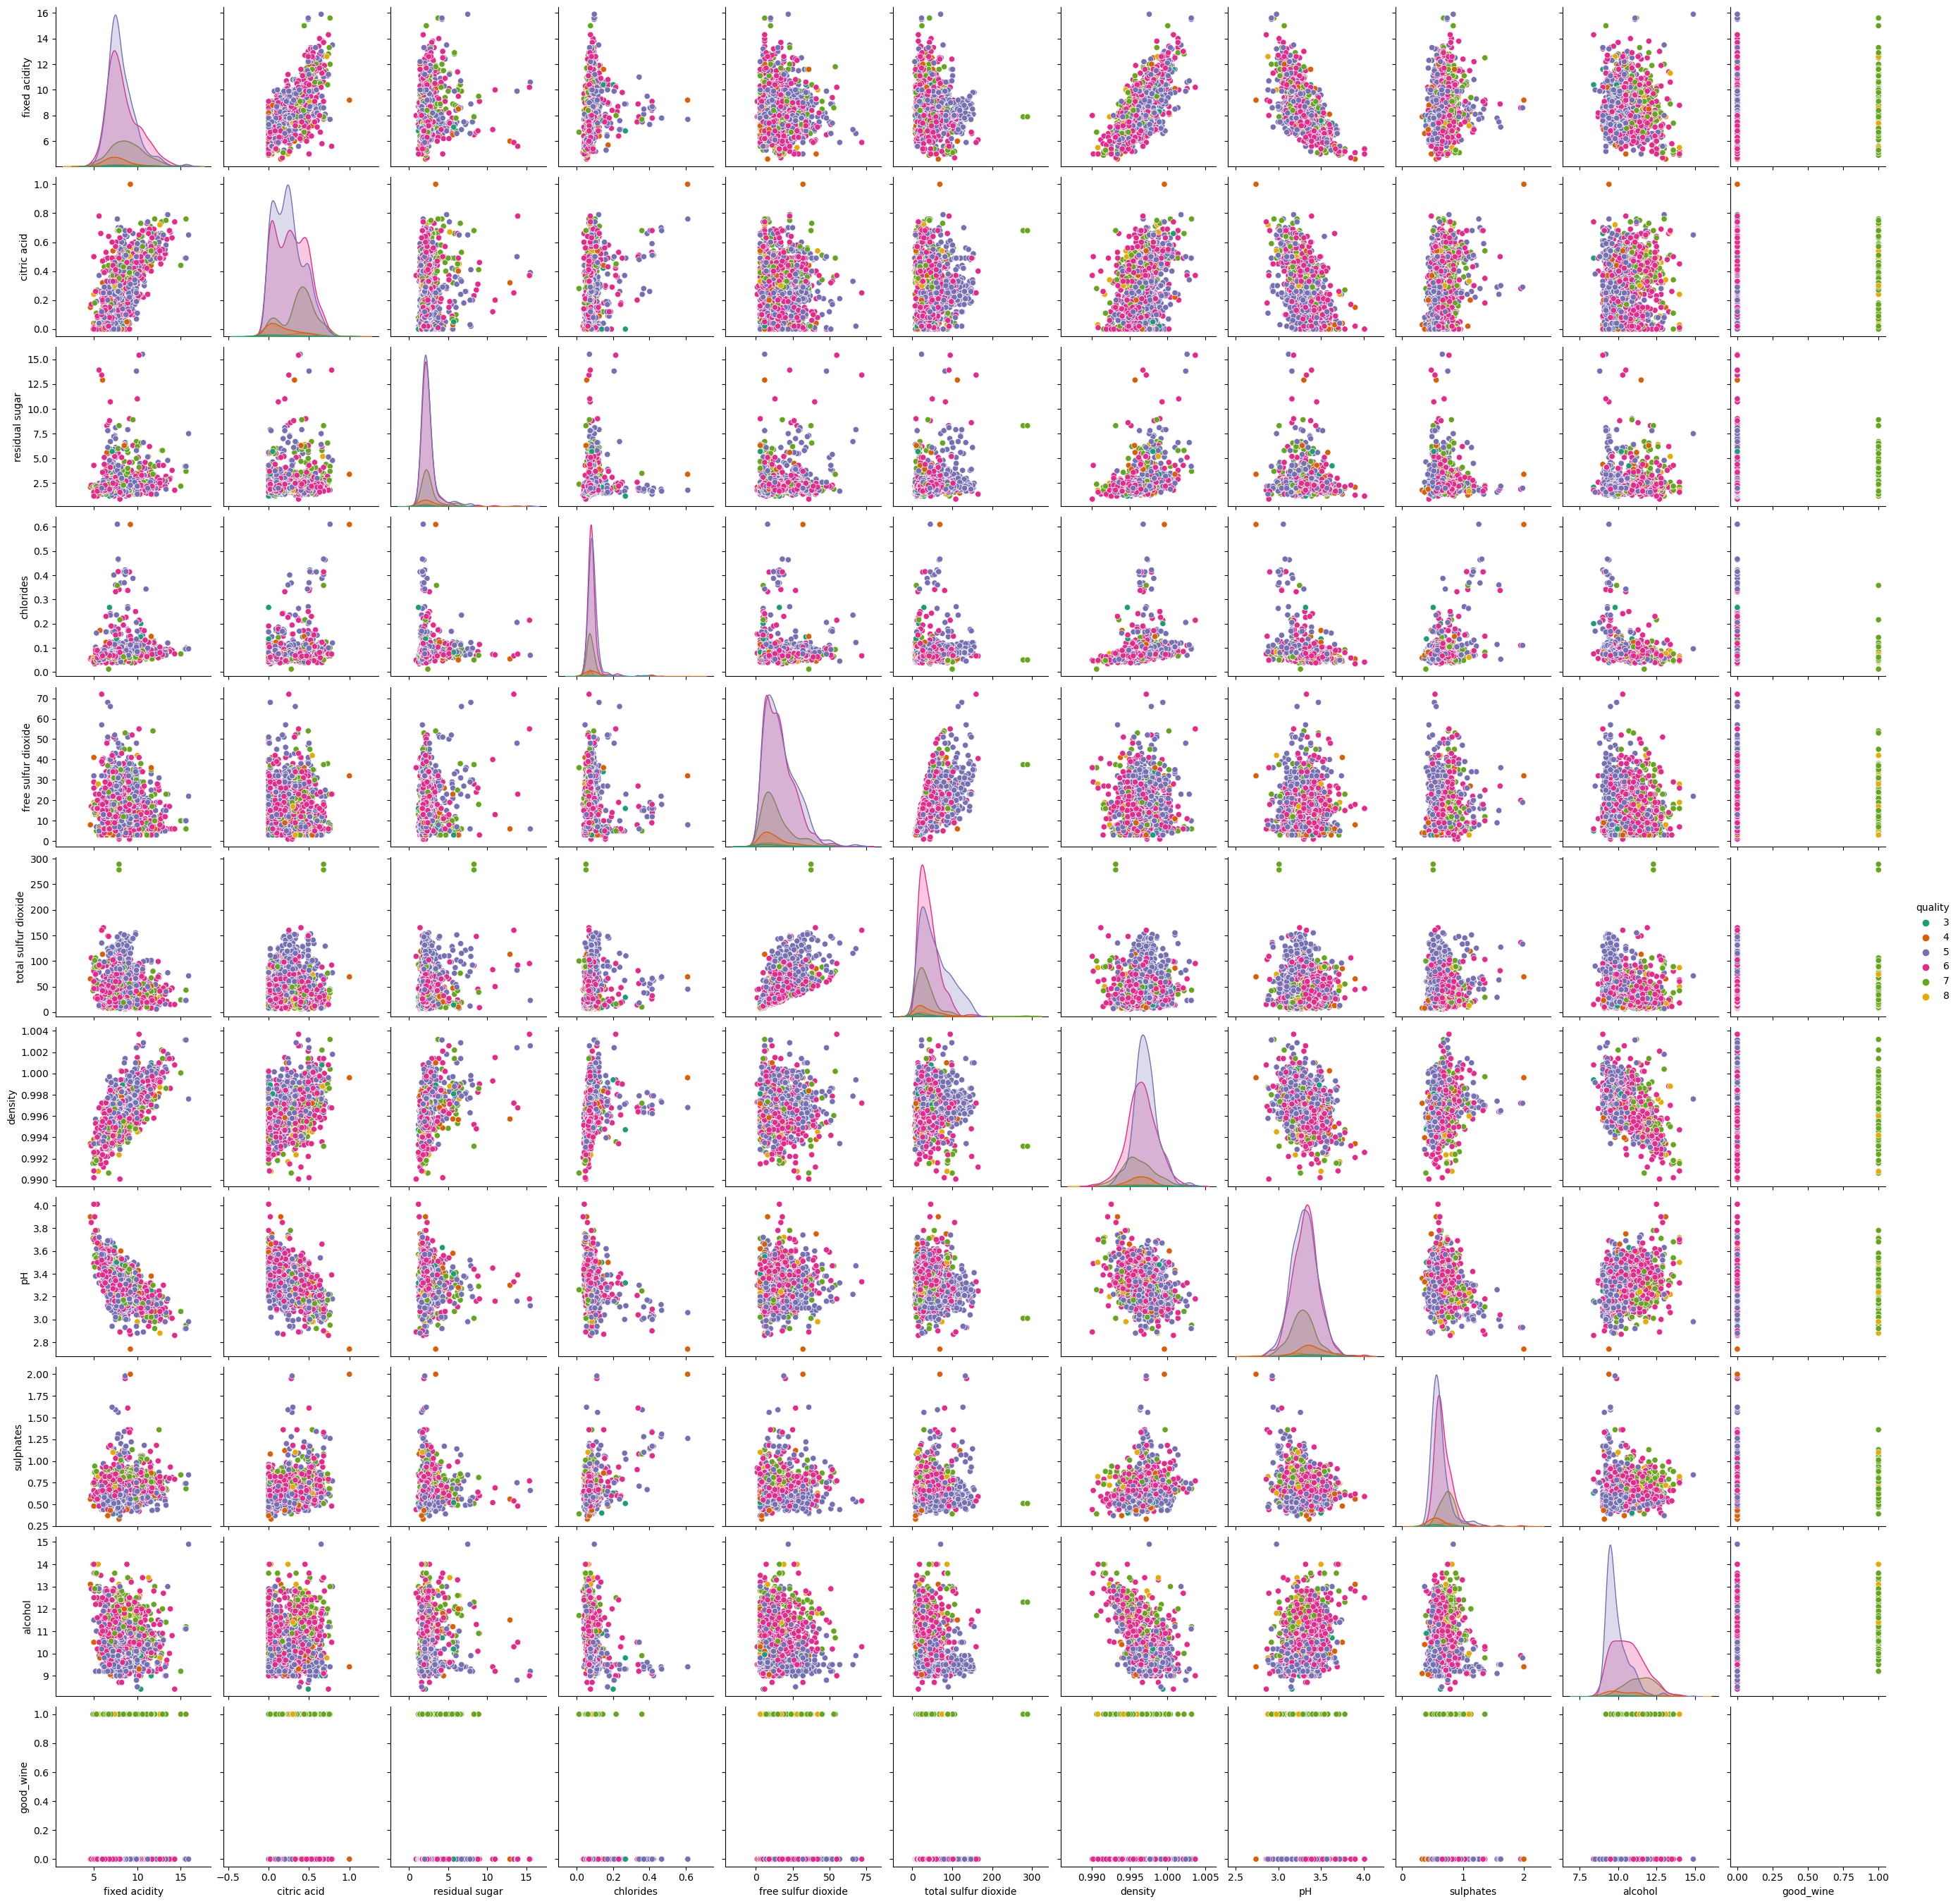

In [25]:
sns.pairplot(df,hue="quality", palette= "Dark2")
plt.show()

# Checking for Outliers

fixed acidity              AxesSubplot(0.125,0.53;0.0945122x0.35)
citric acid             AxesSubplot(0.238415,0.53;0.0945122x0.35)
residual sugar          AxesSubplot(0.351829,0.53;0.0945122x0.35)
chlorides               AxesSubplot(0.465244,0.53;0.0945122x0.35)
free sulfur dioxide     AxesSubplot(0.578659,0.53;0.0945122x0.35)
total sulfur dioxide    AxesSubplot(0.692073,0.53;0.0945122x0.35)
density                 AxesSubplot(0.805488,0.53;0.0945122x0.35)
pH                         AxesSubplot(0.125,0.11;0.0945122x0.35)
sulphates               AxesSubplot(0.238415,0.11;0.0945122x0.35)
alcohol                 AxesSubplot(0.351829,0.11;0.0945122x0.35)
quality                 AxesSubplot(0.465244,0.11;0.0945122x0.35)
good_wine               AxesSubplot(0.578659,0.11;0.0945122x0.35)
dtype: object

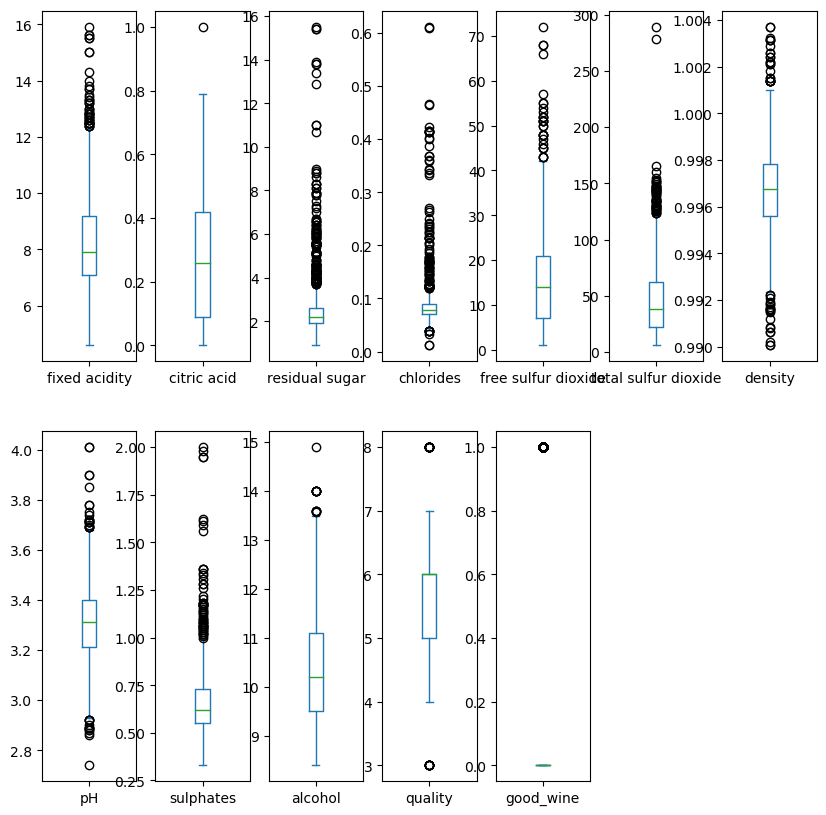

In [26]:
df.plot(kind='box',subplots=True,layout=(2,7),figsize=(10,10))

Observation :- "fixed acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates" have some outliers present

Removing Outliers

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

fixed acidity  citric acid  residual sugar  chlorides  \
0          0.528360     1.391472        0.453218   0.243707   
1          0.298547     1.391472        0.043416   0.223875   
2          0.298547     1.186070        0.169427   0.096353   
3          1.654856     1.484154        0.453218   0.264960   
4          0.528360     1.391472        0.453218   0.243707   
...             ...          ...             ...        ...   
1594       1.217796     0.980669        0.382271   0.053845   
1595       1.390155     0.877968        0.240375   0.541259   
1596       1.160343     0.723916        0.169427   0.243707   
1597       1.390155     0.775267        0.382271   0.264960   
1598       1.332702     1.021999        0.752894   0.434990   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.466193              0.379133  0.558274  1.288643   
1                0.872638              0.624363  0.028261  0.719933   
2                0.083669              0.229047  0.134264  0.331177   
3                0.107592              0.411500  0.664277  0.979104   
4                0.466193              0.379133  0.558274  1.288643   
...                   ...                   ...       ...       ...   
1594             1.542054              0.075043  0.978765  0.899886   
1595             2.211469              0.137820  0.862162  1.353436   
1596             1.255161              0.196679  0.533554  0.705508   
1597             1.542054              0.075043  0.676657  1.677400   
1598             0.203223              0.135861  0.666057  0.511130   

      sulphates   alcohol   quality  good_wine  
0      0.579207  0.960246  0.787823   0.396256  
1      0.128950  0.584777  0.787823   0.396256  
2      0.048089  0.584777  0.787823   0.396256  
3      0.461180  0.584777  0.450848   0.396256  
4      0.579207  0.960246  0.787823   0.396256  
...         ...       ...       ...        ...  
1594   0.461180  0.072294  0.787823   0.396256  
1595   0.601055  0.729364  0.450848   0.396256  
1596   0.542042  0.541630  0.450848   0.396256  
1597   0.305990  0.209308  0.787823   0.396256  
1598   0.010924  0.541630  0.450848   0.396256  

[1599 rows x 12 columns]

In [28]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   42,   43,   45,
         57,   81,   81,   83,   86,   88,   91,   92,   95,  106,  106,
        109,  142,  144,  147,  151,  151,  151,  151,  163,  164,  169,
        169,  181,  226,  226,  240,  243,  244,  258,  258,  274,  281,
        291,  324,  325,  339,  340,  347,  354,  374,  381,  391,  396,
        396,  400,  400,  442,  442,  451,  459,  467,  480,  480,  494,
        515,  517,  544,  554,  554,  555,  555,  557,  557,  568,  584,
        588,  591,  595,  608,  614,  636,  639,  649,  649,  651,  652,
        652,  652,  672,  684,  690,  692,  692,  695,  723,  730,  754,
        776,  777,  795,  821,  832,  836,  837,  889,  899,  911,  917,
        923,  925,  926,  982, 1017, 1018, 1043, 1051, 1051, 1071, 1074,
       1079, 1079, 1081, 1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186,
       1231, 1235, 1244, 1244, 1244, 1260, 1269, 1269, 1270, 1270, 1288,
       1289, 1295, 1296, 1299, 1300, 1316, 1319, 1

observation :- This is abnormal data/ Outliers

In [29]:
df_new=df[(z<3).all(axis=1)]
df_new

fixed acidity  citric acid  residual sugar  chlorides  \
0               7.4         0.00             1.9      0.076   
1               7.8         0.00             2.6      0.098   
2               7.8         0.04             2.3      0.092   
3              11.2         0.56             1.9      0.075   
4               7.4         0.00             1.9      0.076   
...             ...          ...             ...        ...   
1594            6.2         0.08             2.0      0.090   
1595            5.9         0.10             2.2      0.062   
1596            6.3         0.13             2.3      0.076   
1597            5.9         0.12             2.0      0.075   
1598            6.0         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  good_wine  
0         9.4        5          0  
1         9.8        5          0  
2         9.8        5          0  
3         9.8        6          0  
4         9.4        5          0  
...       ...      ...        ...  
1594     10.5        5          0  
1595     11.2        6          0  
1596     11.0        6          0  
1597     10.2        5          0  
1598     11.0        6          0  

[1458 rows x 12 columns]

In [30]:
df=df_new

In [31]:
df

fixed acidity  citric acid  residual sugar  chlorides  \
0               7.4         0.00             1.9      0.076   
1               7.8         0.00             2.6      0.098   
2               7.8         0.04             2.3      0.092   
3              11.2         0.56             1.9      0.075   
4               7.4         0.00             1.9      0.076   
...             ...          ...             ...        ...   
1594            6.2         0.08             2.0      0.090   
1595            5.9         0.10             2.2      0.062   
1596            6.3         0.13             2.3      0.076   
1597            5.9         0.12             2.0      0.075   
1598            6.0         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  good_wine  
0         9.4        5          0  
1         9.8        5          0  
2         9.8        5          0  
3         9.8        6          0  
4         9.4        5          0  
...       ...      ...        ...  
1594     10.5        5          0  
1595     11.2        6          0  
1596     11.0        6          0  
1597     10.2        5          0  
1598     11.0        6          0  

[1458 rows x 12 columns]

Observation :- All the outliers have been removed now the data is cleaned 
    
    Total row count earlier = 1599
    Total row count now=1458
    Total difference=141 rows(has been removed)

In [32]:
df.skew()

fixed acidity           0.827264
citric acid             0.297781
residual sugar          2.457646
chlorides               2.288587
free sulfur dioxide     0.873162
total sulfur dioxide    1.183539
density                 0.061110
pH                      0.109577
sulphates               0.891997
alcohol                 0.754976
quality                 0.400875
good_wine               2.103030
dtype: float64

Observation :- The data for skewness must fall under -0.5 to +0.5 if not the data is having skewness and will have to remove the skewness with the help of 'boxcox' library

"residual sugar","chlorides","chlorides","fixed acidity","free sulfur dioxide"

In [33]:
 from scipy.stats import boxcox

<AxesSubplot:ylabel='Frequency'>

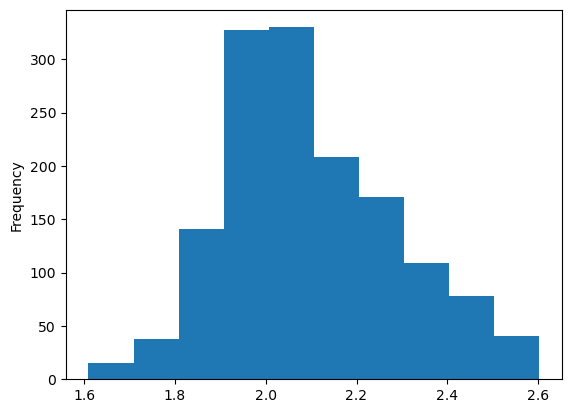

In [34]:
df['fixed acidity']=boxcox(df['fixed acidity'],0)
df['fixed acidity'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

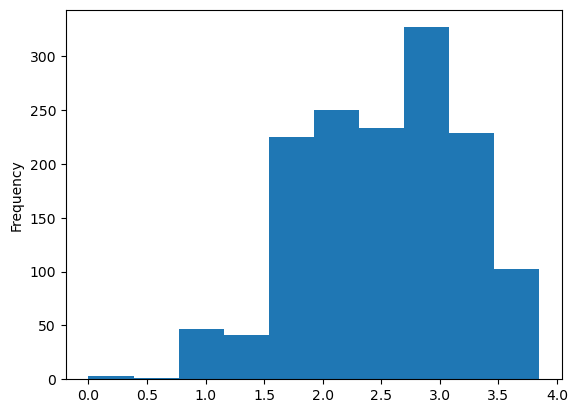

In [35]:
df['free sulfur dioxide']=boxcox(df['free sulfur dioxide'],0)
df['free sulfur dioxide'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

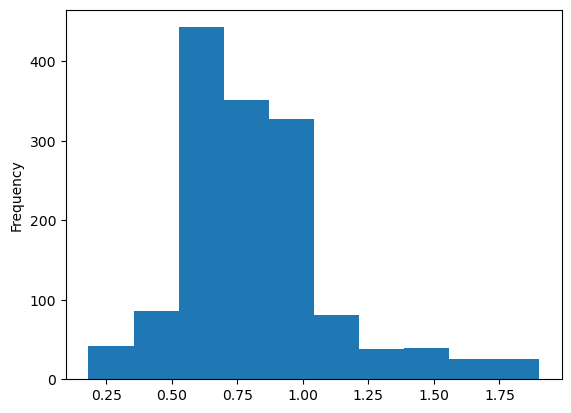

In [36]:
df['residual sugar']=boxcox(df['residual sugar'],0)
df['residual sugar'].plot.hist() 

<AxesSubplot:ylabel='Frequency'>

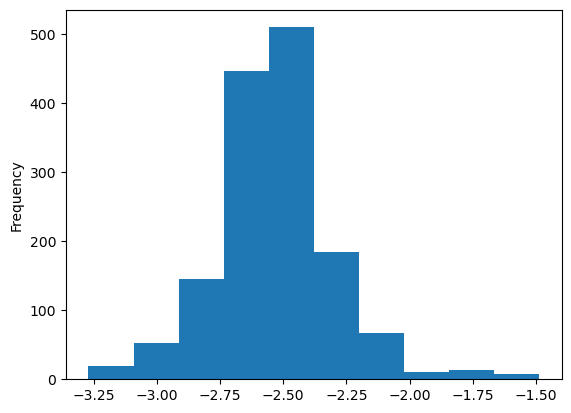

In [37]:
df['chlorides']=boxcox(df['chlorides'],0)
df['chlorides'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

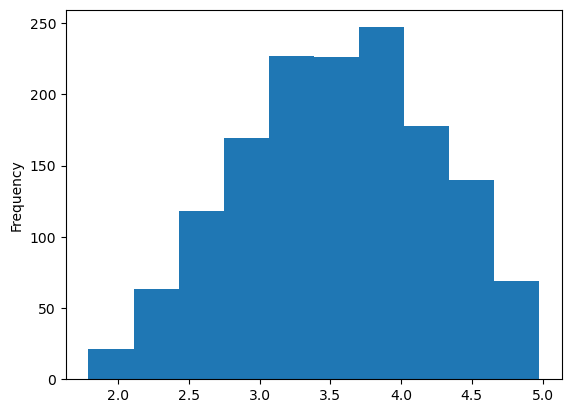

In [38]:
df['total sulfur dioxide']=boxcox(df['total sulfur dioxide'],0)
df['total sulfur dioxide'].plot.hist()

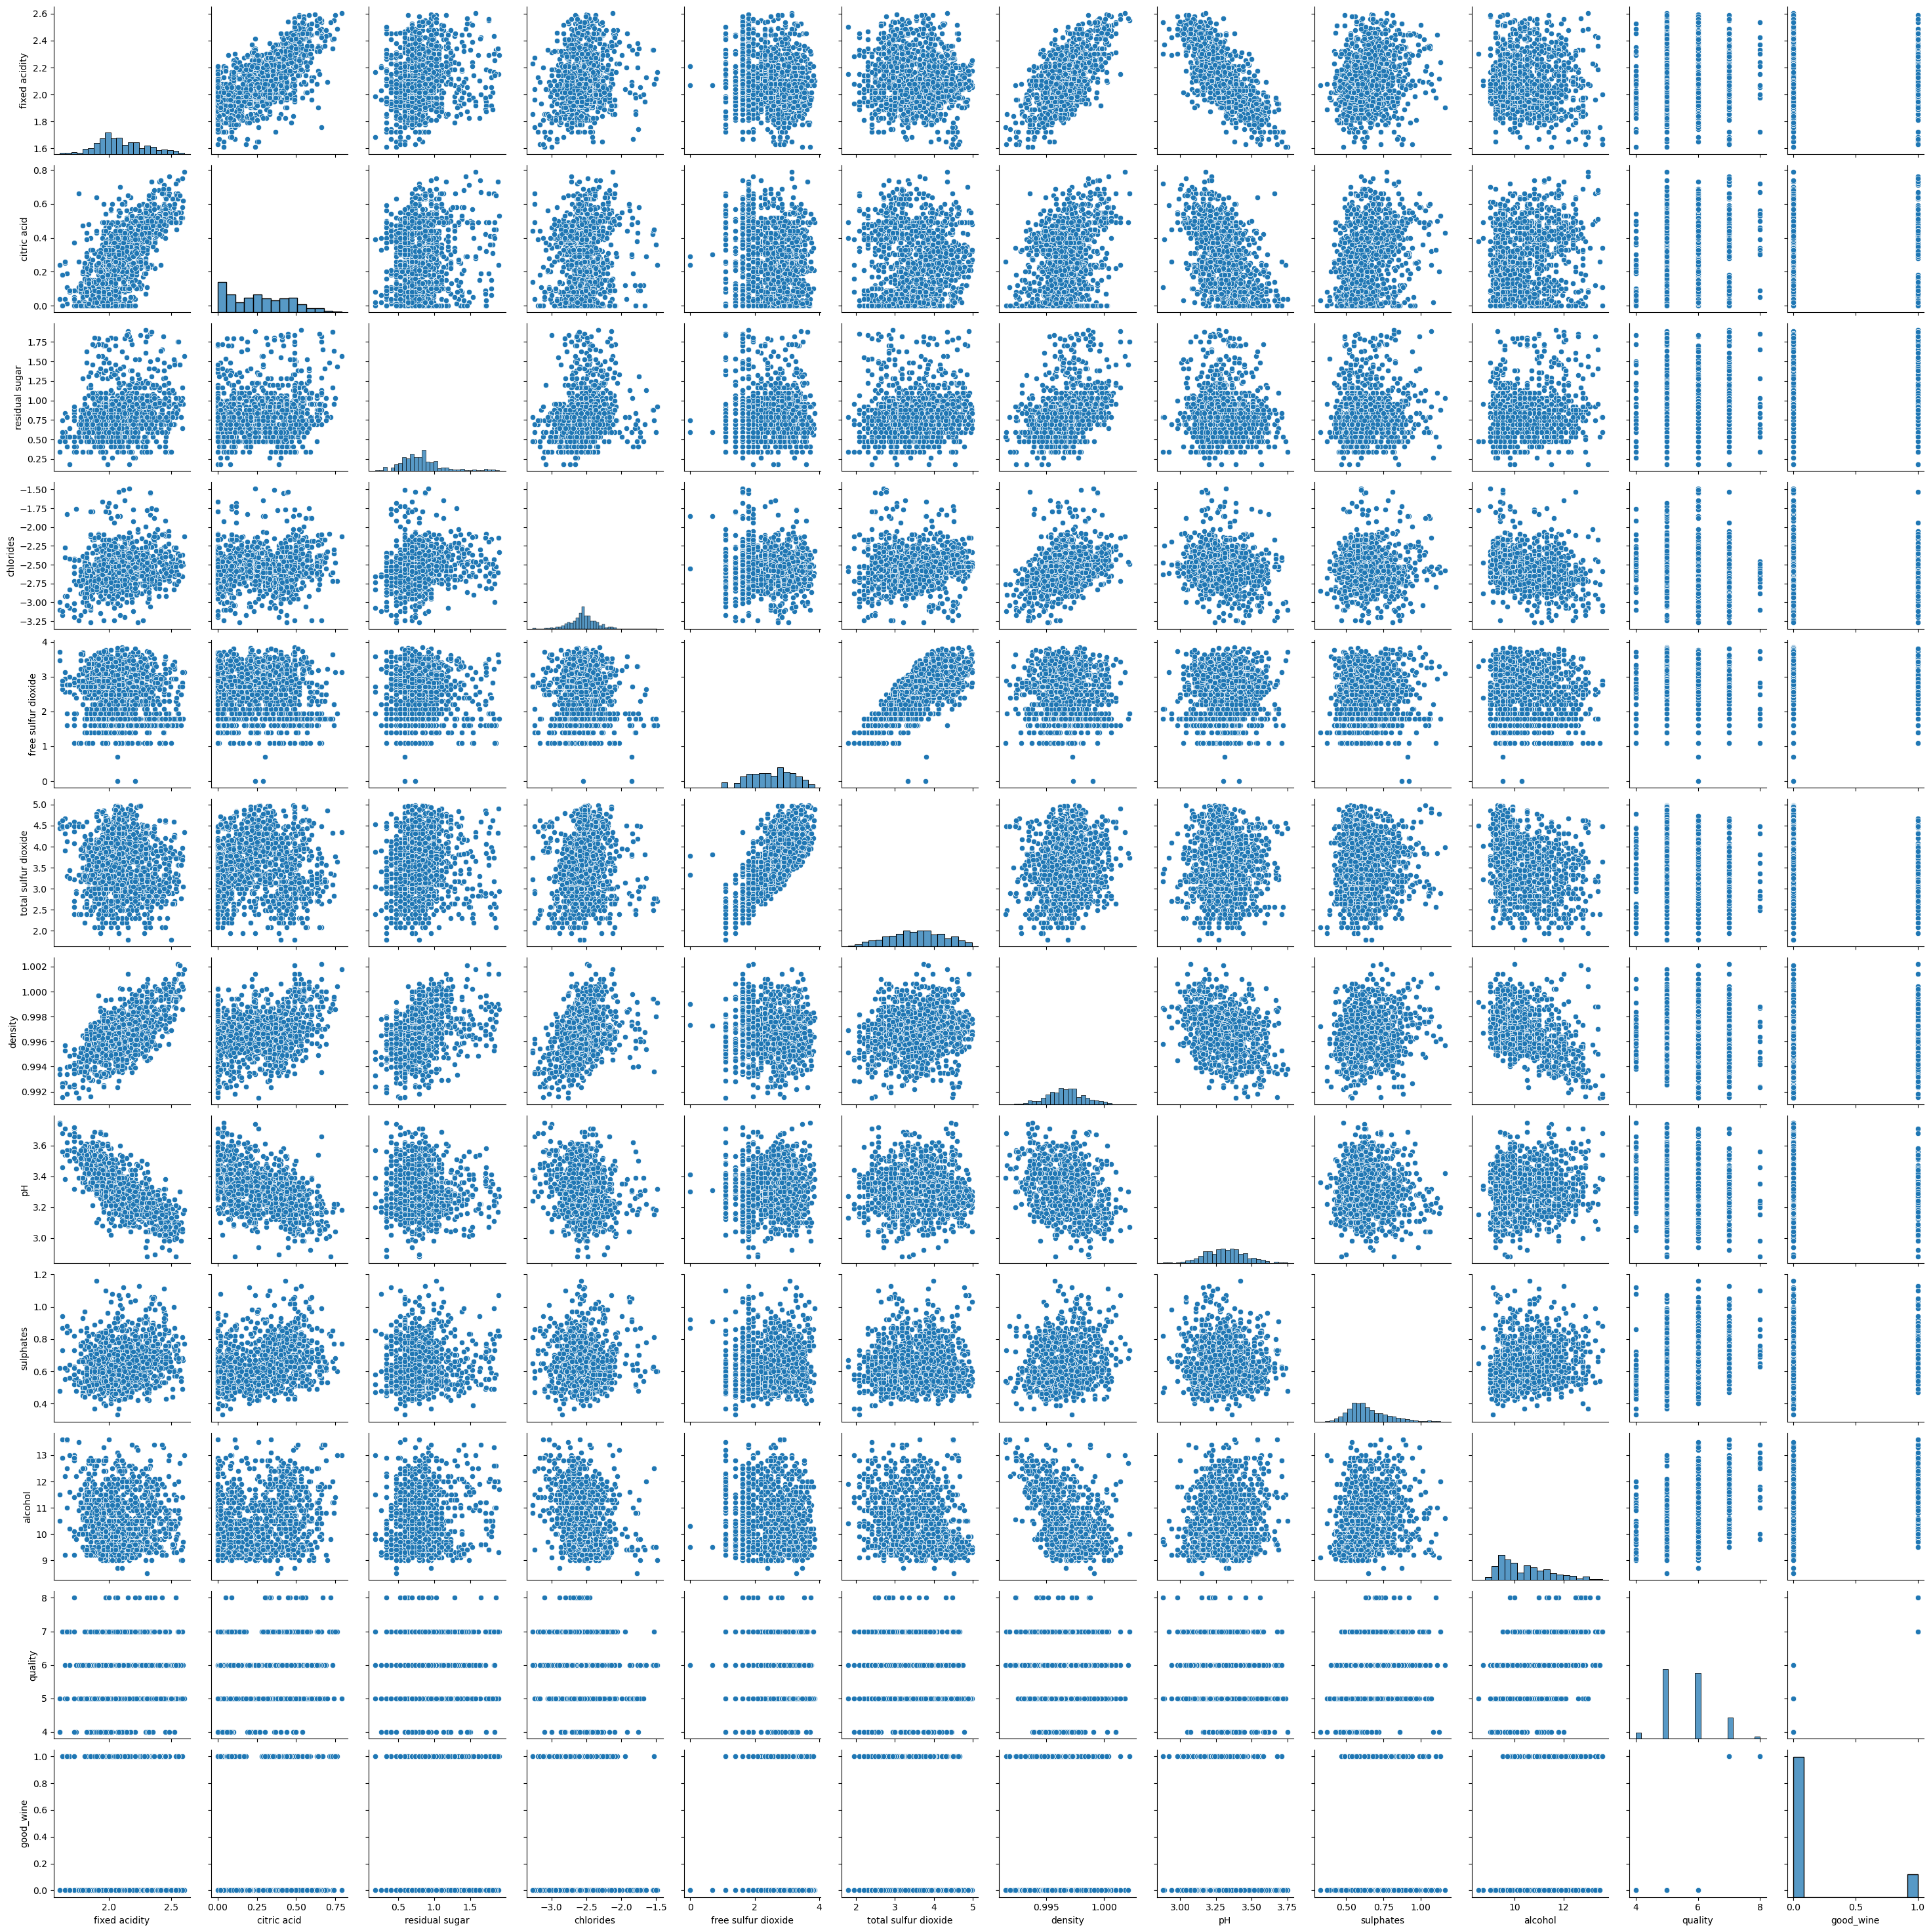

In [39]:
sns.pairplot(df)

Observation :- Before sending data to the model we should always apply standard Scaler Tchnique from this we have scaled the data to overcome the issue of biasness

In [40]:
x=df.drop("good_wine", axis = 1)
y=df["good_wine"]

Feature Scaling using Standard Scalarization

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

fixed acidity  citric acid  residual sugar  chlorides  \
0         -0.510115    -1.385456       -0.619649  -0.181694   
1         -0.233176    -1.385456        0.461628   0.915089   
2         -0.233176    -1.175924        0.038979   0.642531   
3          1.670068     1.547994       -0.619649  -0.238835   
4         -0.510115    -1.385456       -0.619649  -0.181694   
...             ...          ...             ...        ...   
1453      -1.440882    -0.966391       -0.442825   0.547713   
1454      -1.701793    -0.861625       -0.114261  -1.060033   
1455      -1.356710    -0.704476        0.038979  -0.181694   
1456      -1.701793    -0.756859       -0.442825  -0.238835   
1457      -1.613377     1.076547        1.583462  -0.725442   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.166723             -0.040745  0.639183  1.368944   
1                1.065673              0.952747  0.055652 -0.825931   
2                0.298859              0.636818  0.172358 -0.401117   
3                0.486745              0.791130  0.755890 -1.109141   
4               -0.166723             -0.040745  0.639183  1.368944   
...                   ...                   ...       ...       ...   
1453             1.436242              0.336874 -1.053059  0.944130   
1454             1.733203              0.553103 -0.924682  1.439747   
1455             1.288470              0.197282 -0.562892  0.731722   
1456             1.436242              0.336874 -0.720446  1.793759   
1457             0.572547              0.268741 -0.708775  0.519315   

      sulphates   alcohol   quality  
0     -0.630779 -1.001305 -0.834775  
1      0.293286 -0.609253 -0.834775  
2      0.062270 -0.609253 -0.834775  
3     -0.476768 -0.609253  0.441013  
4     -0.630779 -1.001305 -0.834775  
...         ...       ...       ...  
1453  -0.476768  0.076837 -0.834775  
1454   0.909329  0.762928  0.441013  
1455   0.832324  0.566902  0.441013  
1456   0.524302 -0.217202 -0.834775  
1457   0.139275  0.566902  0.441013  

[1458 rows x 11 columns]

We have Scaled the data using Standard Scalarization method to overcome the issue of biasness

# Checking Variance Inflation Factor(VIF)

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values              Features
0     7.883341         fixed acidity
1     2.230162           citric acid
2     1.767211        residual sugar
3     1.224389             chlorides
4     2.837555   free sulfur dioxide
5     3.139337  total sulfur dioxide
6     6.595974               density
7     3.364712                    pH
8     1.366053             sulphates
9     3.434189               alcohol
10    1.562399               quality

By checking VIF values we can find the features causing multicollineraity problem.We can find that "Fixed acidity" is having the highest VIF, we will drop this column first.

In [43]:
x.drop("fixed acidity", axis=1, inplace= True)

Observation :- Checking VIF value to confirm whether the multicollinearity still exist or not

In [44]:
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)
                  for i in range(len(x.columns))]
vif["features"]=x.columns

vif

VIF values              features
0    1.993648           citric acid
1    1.542517        residual sugar
2    1.215874             chlorides
3    2.802018   free sulfur dioxide
4    3.020543  total sulfur dioxide
5    2.643847               density
6    1.554387                    pH
7    1.347629             sulphates
8    2.595926               alcohol
9    1.561093               quality

Observation :- When 2 features are highly correleted then they are affecting each other, if 1 is dropped then other one gets normal, now all the features are under threshold of 5, hence we can say that we have solved the multicolinearity issue

In [45]:
y.value_counts()

0    1257
1     201
Name: good_wine, dtype: int64

Observation :- This data is not balanced, as this is a classic classification problem we will balance this data using oversampling method

Sampling not completed as the installation codes are not running in this Machine, still I will try to do it again

# OverSampling

In [46]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [47]:
y1.value_counts()

0    1257
1    1257
Name: good_wine, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
maxAccu = 0 
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR =RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best accuracy is",maxAccu,"at random_state",maxRS)


Best accuracy is 1.0 at random_state 1


Creating train test split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

Classification Algorithms

In [50]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

RandomForestClassifier

In [51]:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

1.0
[[384   0]
 [  0  54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00        54

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



Logistic Regression

In [52]:
LR= LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

1.0
[[384   0]
 [  0  54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00        54

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



In [53]:
svc= SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[384   0]
 [  0  54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00        54

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



In [54]:
GB= GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

1.0
[[384   0]
 [  0  54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       384
           1       1.00      1.00      1.00        54

    accuracy                           1.00       438
   macro avg       1.00      1.00      1.00       438
weighted avg       1.00      1.00      1.00       438



Cross Validation Score

In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)- score.mean())

[1. 1. 1. 1. 1.]
1.0
The difference between accuracy score and cross validation score is -  0.0


In [57]:
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predLR)- score.mean())

[1. 1. 1. 1. 1.]
1.0
The difference between accuracy score and cross validation score is -  0.0


In [58]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)- score.mean())

[0.99315068 1.         1.         0.99656357 1.        ]
0.9979428517629337
The difference between accuracy score and cross validation score is -  0.002057148237066264


In [59]:
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("The difference between accuracy score and cross validation score is - ",accuracy_score(y_test,predRFC)- score.mean())

[1. 1. 1. 1. 1.]
1.0
The difference between accuracy score and cross validation score is -  0.0


Hyper Parameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion :['gini','entropy'],
              'random_state' : [10,50,1000],
              'max_depth' : [0,10,20],
              'n_jobs' : [-2,-1,1],
              'n_estimators' : [50,100,200,300]}

SyntaxError: invalid syntax (1314770772.py, line 3)

Plotting ROC and compare AUC for the best model

In [60]:
from sklearn import metrics
frp,trp,threshold =metrics.roc_curve(y_test,pred)
roc_auc= metrics.auc(frp,trp)
display=metrics.RocCurveDisplay(frp=frp,trp=trp,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

ValueError: Found input variables with inconsistent numbers of samples: [438, 755]